<img src = 'images/logo.jpg'>

### GAN Exercise
### Neural Network Course (Dr. Azadeh Mansouri)
### Kharazmi University of Technology 
### Department of Computer & Electrical Engineering
### -----------------------------------------------------------------------
### Researcher: Ali Forghani Elah Abadi
### Student ID: 973082512
    

# Problem No.1

In [0]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

%config IPCcompeleter.greedy = True

import tensorflow 
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
np.random.seed(400)

Using TensorFlow backend.


In [0]:
#splitting data to train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
#normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255 

In [0]:
#flatting the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


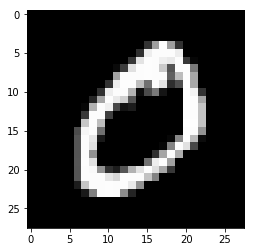

In [0]:
#show sample image in the dataset
plt.imshow(X_train[1].reshape(28,28).copy(),cmap='gray')

In [0]:
#import keras package

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Input,UpSampling2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D
from keras.utils import np_utils
from keras.models import Model
from keras.optimizers import SGD

In [0]:
#define autoencoder sequential model with decode output dimension 64

rep_64_model = Sequential()
rep_64_model.add(Dense(64,input_shape = (784,), activation='relu', kernel_initializer='uniform'))
rep_64_model.add(Dense(784, activation='sigmoid', kernel_initializer='uniform', input_shape = (64, )))
rep_64_model.summary()

W0619 18:55:04.571235 140226036037504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 18:55:04.586099 140226036037504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 18:55:04.589166 140226036037504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [0]:
#model compile

rep_64_model.compile(optimizer=SGD(lr=0.001, 
                    momentum=0.9, 
                    nesterov=True),
              loss='binary_crossentropy',
              metrics =['accuracy'])

W0619 18:55:09.900660 140226036037504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 18:55:09.909127 140226036037504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0619 18:55:09.915056 140226036037504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#model fit
hist = rep_64_model.fit(X_train, X_train,
                epochs=20,
                batch_size=32,
                verbose = 1)

W0619 18:55:13.606812 140226036037504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.6825 - acc: 0.5217
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.5778 - acc: 0.7336
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3701 - acc: 0.7916
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3040 - acc: 0.7947
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2890 - acc: 0.7950
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2830 - acc: 0.7953
Epoch 7/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2798 - acc: 0.7954
Epoch 8/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2776 - acc: 0.7955
Epoch 9/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2760 - acc: 0.7958
Epoch 10/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2747 - acc: 0.7959

In [0]:
#model evaluate

score = rep_64_model.evaluate(X_test, X_test, verbose = 0)

print('Test Loss: ', score[0])
print('Test accuracy: ', score[1])

Test Loss:  0.2613759163379669
Test accuracy:  0.7982766578674316


In [0]:
#get output of intermediate layer of network and calculate mean of active neuron number 

from keras import backend as K

intermediate_layer_model = Model(inputs=rep_64_model.input,
                                 outputs=rep_64_model.layers[0].output)
intermediate_output = intermediate_layer_model.predict(X_test)

print(intermediate_output)
print(intermediate_output.shape[0])

counter = 0
for inputs in intermediate_output:
  for neuron_output in inputs:
    if neuron_output > 0.0:
      counter += 1
      
active_neuron_mean = counter / X_test.shape[0]
print(active_neuron_mean)
  
  

[[0.28880388 1.4853616  0.         ... 5.3194637  0.81474817 0.580539  ]
 [0.4475757  1.4766014  0.27622163 ... 5.847532   0.23584837 0.        ]
 [0.05887042 0.6658637  0.05894225 ... 3.5140688  0.21977413 0.12595332]
 ...
 [0.13852277 2.1369596  0.         ... 9.176304   1.0372199  1.0226899 ]
 [0.29287297 1.7371991  0.31178403 ... 7.5340595  1.1667852  0.72664386]
 [0.93827206 3.0390584  0.6052752  ... 8.822521   1.9302658  0.08467958]]
10000
49.9971


In [0]:
#define autoencoder sequential model with decode output dimension 4

rep_4_model = Sequential()
rep_4_model.add(Dense(4,input_shape = (784,), activation='relu', kernel_initializer='uniform'))
rep_4_model.add(Dense(784, activation='sigmoid', kernel_initializer='uniform', input_shape = (4, )))
rep_4_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               3920      
Total params: 7,060
Trainable params: 7,060
Non-trainable params: 0
_________________________________________________________________


In [0]:
#model compile

rep_4_model.compile(optimizer=SGD(lr=0.001, 
                    momentum=0.9, 
                    nesterov=True),
              loss='binary_crossentropy',
              metrics =['accuracy'])

In [0]:
#model fit

hist = rep_4_model.fit(X_train, X_train,                epochs=20,
                batch_size=32,
                verbose = 1)

Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.6912 - acc: 0.5794
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.6861 - acc: 0.6457
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.6608 - acc: 0.6477
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.5006 - acc: 0.7659
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3354 - acc: 0.7922
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2976 - acc: 0.7942
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2872 - acc: 0.7941
Epoch 8/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2827 - acc: 0.7940
Epoch 9/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2801 - acc: 0.7938
Epoch 10/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2784 - acc: 0.7939

In [0]:
#model evaluate

score = rep_4_model.evaluate(X_test, X_test, verbose = 0)

print('Test Loss: ', score[0])
print('Test accuracy: ', score[1])

Test Loss:  0.2716406193733215
Test accuracy:  0.7928811222076416


In [0]:
#get output of intermediate layer of network and calculate mean of active neuron number 

from keras import backend as K

intermediate_layer_model = Model(inputs=rep_4_model.input,
                                 outputs=rep_4_model.layers[0].output)
intermediate_output = intermediate_layer_model.predict(X_test)

print(intermediate_output)
print(intermediate_output.shape[0])

counter = 0
for inputs in intermediate_output:
  for neuron_output in inputs:
    if neuron_output > 0.0:
      counter += 1
      
active_neuron_mean = counter / X_test.shape[0]
print(active_neuron_mean)

[[ 0.         0.        19.53687    2.024558 ]
 [ 0.         0.        21.990334   1.2393532]
 [ 0.         0.        15.951126   1.1730964]
 ...
 [ 0.         0.        35.85102    2.8060591]
 [ 0.         0.        28.413273   2.1321666]
 [ 0.         0.        33.727398   1.3078871]]
10000
2.1071


## Report

<p dir = 'rtl' style="text-align:right;">  
    در این تمرین با استفاده از اتوانکدر داده ها را به ابعادی پایین تر بردیم و سپس از روی نمایش بعد پایین مجددا سعی بر باز سازی داده اصلی داشتیم. ما در ابتدا با در نظر گرفتن 64 نورون برای لایه میانی پس از آموزش شبکه و ارزیابی دقت آن تعداد نورون های فعال را محاسبه نموده و میانگین این تعداد بر اساس داده های آزمون را به دست آوردیم . سپس  با در نظر گرفتن مدل اتوانکدری مشابه اما با تعداد نورون میانی پایین تر مجددا شبکه آموزش داده و میانگین تعداد نورون های فعال برای آن به ازای داده های آزمون را به دست آوردیم. با توجه به دو مورد به دست آمده همانطور که قابل مشاهده است در حالت دارای 64 نورون میانی درصد نورون های غیر فعال بیش از حالت 4 نورونی است چرا که منطقا شبکه در تعداد 64 نورون میانی میتواند به راحتی بادرصدی از این نورون به نسبت مدل دیگر تعداد بالا ، ریپرزنت مورد نیاز را به دست آورد. از مزایای تنک کردن شبکه آن است که میتواند داده های بی اهمیت را دور بریزد و نگاشتی از داده ورودی را بیابد که بیانگر مقادیر اصلی آن داده است و به همین دلیل است که میتوان داده اصلی را تا حدودی توسط خروجی لایه میانی بازسازی نمود. حال آن که باید توجه داشت که در نظر گرفتن مقدار بسیار کوچک برای تعداد نورون های لایه میانی میتواند برخی اطلاعات مفید تصویر را در در کاربرد ما از بین ببرد و انتخاب این تعداد نورون لایه میانی کاملا بستگی به کاربرد ما خواهد داشت 
</p>

# Problem No.2

In [0]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

%config IPCcompeleter.greedy = True

import tensorflow 
import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(400)

In [0]:
#splitiing data to train and test

import matplotlib.pyplot as plt
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
#normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

In [0]:
#print shape of train and test set

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


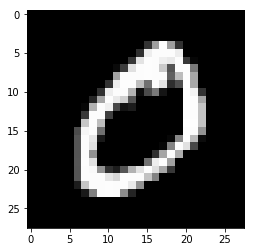

In [0]:
#plotting sample image of dataset 

plt.imshow(X_train[1].reshape(28,28).copy(),cmap='gray')

In [0]:
#import keras package 

from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten,Input,UpSampling2D, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D
from keras.utils import np_utils
from keras.models import Model
from keras.optimizers import SGD
from keras import backend as K

In [0]:
#define convolutional autoencoder model

input_img = Input(shape=(28, 28, 1)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)

x = Reshape((4, 4, 1), name="latent")(x)

x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [0]:
#model compile 

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=SGD(lr=0.001, 
                    momentum=0.9, 
                    nesterov=True),
              loss='binary_crossentropy',
              metrics =['accuracy'])

In [0]:
#reshape data

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
#model fit

hist = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                verbose = 1)

W0623 20:32:26.451152 140328423892864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
60000/60000 [==============================] - 16s 269us/step - loss: 0.3514 - acc: 0.8030
Epoch 2/50
60000/60000 [==============================] - 10s 164us/step - loss: 0.2285 - acc: 0.7785
Epoch 3/50
60000/60000 [==============================] - 10s 167us/step - loss: 0.2141 - acc: 0.7801
Epoch 4/50
60000/60000 [==============================] - 10s 169us/step - loss: 0.2062 - acc: 0.7838
Epoch 5/50
60000/60000 [==============================] - 10s 169us/step - loss: 0.2013 - acc: 0.7869
Epoch 6/50
60000/60000 [==============================] - 10s 165us/step - loss: 0.1974 - acc: 0.7889
Epoch 7/50
60000/60000 [==============================] - 10s 165us/step - loss: 0.1934 - acc: 0.7906
Epoch 8/50
60000/60000 [==============================] - 10s 167us/step - loss: 0.1899 - acc: 0.7920
Epoch 9/50
60000/60000 [==============================] - 10s 167us/step - loss: 0.1867 - acc: 0.7929
Epoch 10/50
60000/60000 [==============================] - 10s 168us/step - loss: 

In [0]:
#define psnr (Peak signal-to-noise Ratio) function

import numpy as np

def PSNR(true_image, pred_image):
    mse = np.mean( (true_image - pred_image) ** 2 )
    PIXEL_MAX = 1.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [0]:
#set true & predicted image to use in calculating the psnr parameter
y_true = X_test
y_pred = autoencoder.predict(X_test)

print(y_true.shape)
print(y_pred.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
#calculating average of psnr output in test data

import math 
import numpy as np

psnr_sum = 0
for true_image, pred_image in zip(y_true, y_pred):
  psnr_sum += PSNR(true_image, pred_image)

psnr_average = psnr_sum / y_true.shape[0]
print(psnr_average)
    

15.757522575637209


In [0]:
#print model summary

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [0]:
#generate output value of latent layer 

from keras import backend as K

intermediate_layer_model = Model(inputs=autoencoder.input,
                                 outputs=autoencoder.get_layer('latent').output)

intermediate_output = intermediate_layer_model.predict(X_test)


#reshape data to dimention of data and features
intermediate_output = intermediate_output.reshape(10000, 16)
print(intermediate_output.shape)

(10000, 16)


In [0]:
#import sklearn preprocessing tools for scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [0]:
#fit PCA Dimension Reduction model to output of latent layer (intermediate layer)

from sklearn.decomposition import PCA

pca = PCA(n_components=3)   # feature dimension of PCA output is 3
pca.fit(intermediate_output)  #fit

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_pca = pca.transform(intermediate_output)   # transform data from high dimension to low dimension

In [0]:
print(X_pca.shape) #print PCA output shape

(10000, 3)


In [0]:
#scaling pca output 

scalerX = StandardScaler()
scalerX.fit(X_pca)

new_data = scalerX.transform(X_pca)

print(new_data.shape)

(10000, 3)


In [0]:
#import package to plot data in 3d space

from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

In [0]:
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

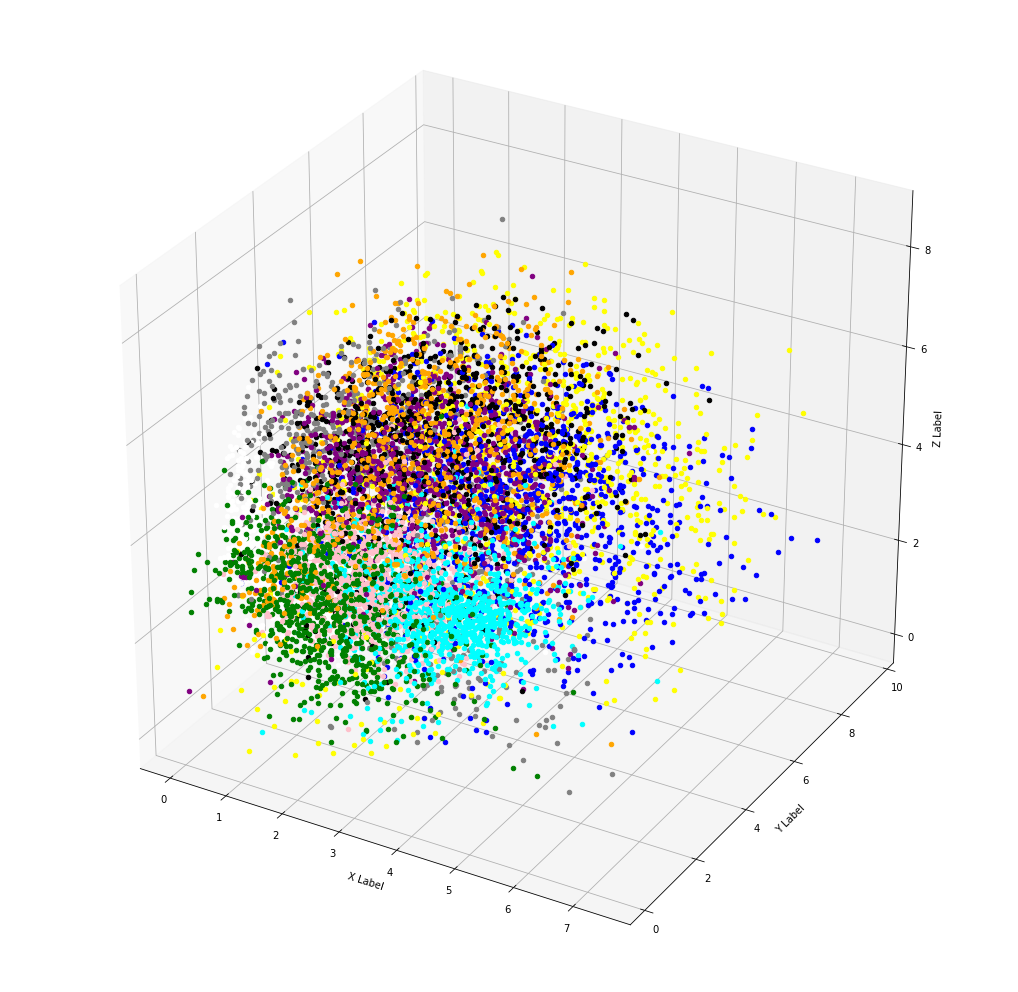

In [0]:
#plotting PCA output in 3D dimension

n = 1000
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for index in range(0, intermediate_output.shape[0]):
    if y_test[index] == 0:
      color = 'black'
    if y_test[index] == 1:
      color = 'white'
    if y_test[index] == 2:
      color = 'yellow'
    if y_test[index] == 3:
      color = 'blue'
    if y_test[index] == 4:
      color = 'green'
    if y_test[index] == 5:
      color = 'orange'
    if y_test[index] == 6:
      color = 'gray'
    if y_test[index] == 7:
      color = 'cyan'
    if y_test[index] == 8:
      color = 'purple'
    if y_test[index] == 9:
      color = 'pink'
     
    ax.scatter(intermediate_output[index][0], intermediate_output[index][1], intermediate_output[index][2], marker='o', c = color)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Report 

<p dir = 'rtl' style="text-align:right;">  
    در سوال حاضر خود رمزنگاری برای داده های امنیست طراحی نمودیم و پس از آموزش آن با تعریف تابع نسبت سیگنال به نویز که فرمول آن در پایین آمده است مقدار این پارامتر را به ازای تصاویر آزمون و خروجی اتوانکدر به ازای این تصاویر به دست آورده و میانگین آن را محاسبه نمودیم. سپس پس از استخراج خروجی لایه میانی به ازای داده های آزمون، این خروجی را با استفاده از یک روال کاهش بعد به یک فضای ویژگی های سه بعدی نگاشت کرده و اقدام به نمایش این داده ها در این فضا نمودیم به صورتی که هر داده رنگی مختص به برچسب متناظر با خود دارد. بر اساس این نمایش میتوان به خوبی مشاهده کرد که هر یک از برچسب ها داده های مربوطش در ناحیه ای نزدیک به یک دیگر قرار گرفته اند. 
</p>

# Problem No.3

In [0]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

%config IPCcompeleter.greedy = True

import tensorflow 
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
np.random.seed(400)

In [0]:
#import fashion_mnist dataset

from keras.datasets import fashion_mnist

#splitting data to train and test
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
#normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

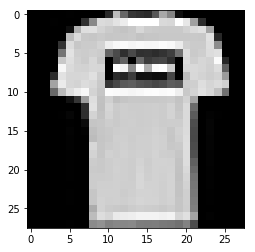

In [0]:
#plot sample image in dataset
plt.imshow(X_train[1].reshape(28,28).copy(),cmap='gray')

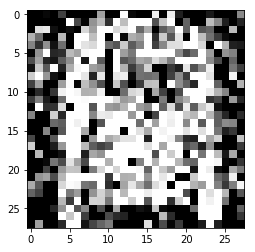

In [0]:
#generate noisy data by use normal distribution with mean 0 and variance 1 noise model

X_train_noisy  = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
plt.imshow(X_test_noisy[1].reshape(28,28).copy(), cmap = 'gray')

In [0]:
#import keras package

from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten,Input,UpSampling2D, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D
from keras.utils import np_utils
from keras.models import Model
from keras.optimizers import SGD
from keras import backend as K

In [0]:
#define autoencoder model

input_img = Input(shape= (28, 28, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding = 'same')(x)

print ("shape of encoded" , K.int_shape(encoded))


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

print("shape of decoded", K.int_shape(decoded))
                                                                  
                                                                  

shape of encoded (None, 7, 7, 32)
shape of decoded (None, 28, 28, 1)


In [0]:
#model compile (loss = mean squre error)

autoencoder_mse_loss = Model(input_img, decoded)
autoencoder_mse_loss.compile(optimizer=SGD(lr=0.001, 
                    momentum=0.9, 
                    nesterov=True),
              loss='mean_squared_error',
              metrics =['accuracy'])

In [0]:
#reshape data

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train_noisy = X_train_noisy.reshape(60000,28,28,1)
X_test_noisy = X_test_noisy.reshape(10000,28,28,1)

In [0]:
#model fit

autoencoder_mse_loss.fit(X_train_noisy, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                verbose = 1)

Epoch 1/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0823 - acc: 0.5019
Epoch 2/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.0344 - acc: 0.5021
Epoch 3/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.0311 - acc: 0.5025
Epoch 4/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.0296 - acc: 0.5029
Epoch 5/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.0285 - acc: 0.5033
Epoch 6/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.0277 - acc: 0.5035
Epoch 7/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.0270 - acc: 0.5037
Epoch 8/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.0265 - acc: 0.5039
Epoch 9/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.0261 - acc: 0.5041
Epoch 10/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.0257 - a

In [0]:
#model evaluate
score = autoencoder_mse_loss.evaluate(X_test_noisy, X_test, verbose = 0)

print('Test Loss: ', score[0])
print('Test accuracy: ', score[1])

Test Loss:  0.021232272523641585
Test accuracy:  0.5035190056800842


In [0]:
#model compile (loss = binary cross entropy)

autoencoder_binary_crossentropy_loss = Model(input_img, decoded)
autoencoder_binary_crossentropy_loss.compile(optimizer=SGD(lr=0.001, 
                    momentum=0.9, 
                    nesterov=True),
              loss='binary_crossentropy',
              metrics =['accuracy'])

In [0]:
#reshape data

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train_noisy = X_train_noisy.reshape(60000,28,28,1)
X_test_noisy = X_test_noisy.reshape(10000,28,28,1)

In [0]:
#model fit

autoencoder_binary_crossentropy_loss.fit(X_train_noisy, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                verbose = 1)

Epoch 1/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.3099 - acc: 0.5057
Epoch 2/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.3094 - acc: 0.5056
Epoch 3/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.3089 - acc: 0.5057
Epoch 4/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.3086 - acc: 0.5057
Epoch 5/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.3082 - acc: 0.5057
Epoch 6/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.3079 - acc: 0.5057
Epoch 7/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.3076 - acc: 0.5057
Epoch 8/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.3073 - acc: 0.5058
Epoch 9/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.3070 - acc: 0.5058
Epoch 10/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.3068 - a

In [0]:
#model evaluate
score = autoencoder_binary_crossentropy_loss.evaluate(X_test_noisy, X_test, verbose = 0)

print('Test Loss: ', score[0])
print('Test accuracy: ', score[1])

Test Loss:  0.30362035150527955
Test accuracy:  0.5042725758552551


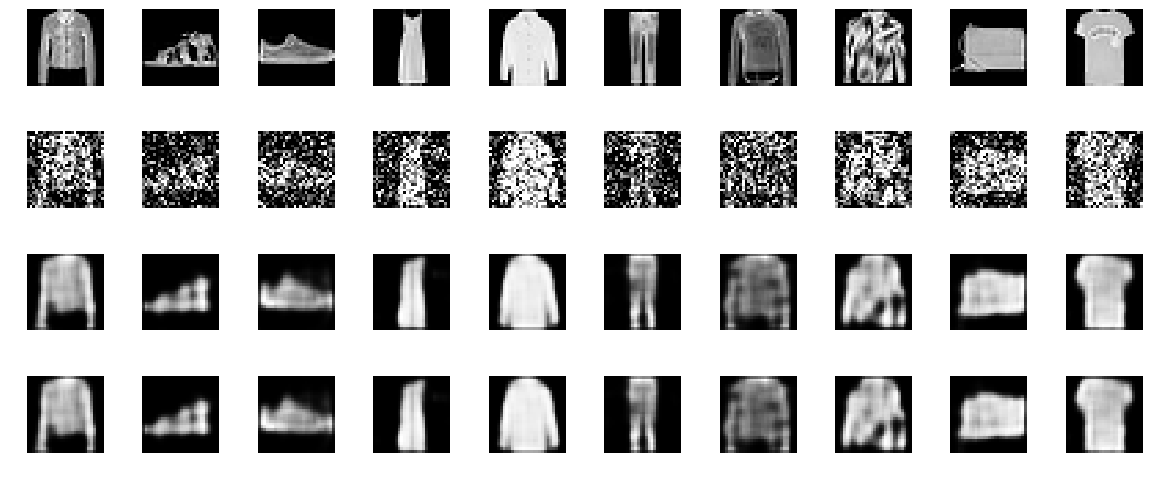

In [0]:
#denoise image by use two model (mse loss autoencoder model & cross entropy autoencoder model)

new_mse = autoencoder_mse_loss.predict(X_test_noisy)
new_binary_crossentropy = autoencoder_binary_crossentropy_loss.predict(X_test_noisy)

fig = plt.figure(figsize=(20, 9))
counter = 1
for index in range(10, 20):

  plt.subplot(4, 10, counter)
  plt.axis('off')
  plt.imshow(X_test[index].reshape(28,28).copy(), cmap = 'gray')
  plt.subplots_adjust(hspace = 0, wspace = 0.5)
  #plt.title('Original Image Without Noise')
  counter += 1
  
  
for index in range(10, 20):

  plt.subplot(4, 10, counter)
  plt.axis('off')
  plt.imshow(X_test_noisy[index].reshape(28,28).copy(), cmap = 'gray')
  plt.subplots_adjust(hspace = 0, wspace = 0.5)
  #plt.title('Original Image Without Noise')
  counter += 1
  
  
for index in range(10, 20):

  plt.subplot(4, 10, counter)
  plt.axis('off')
  plt.imshow(new_mse[index].reshape(28,28).copy(), cmap = 'gray')
  plt.subplots_adjust(hspace = 0, wspace = 0.5)
  #plt.title('Original Image Without Noise')
  counter += 1
  
for index in range(10, 20):

  plt.subplot(4, 10, counter)
  plt.axis('off')
  plt.imshow(new_binary_crossentropy[index].reshape(28,28).copy(), cmap = 'gray')
  plt.subplots_adjust(hspace = 0, wspace = 0.5)
  #plt.title('Original Image Without Noise')
  counter += 1
  


## Report

<p dir = 'rtl' style="text-align:right;">  
    در این تمرین یک روال کاهش نویز را به وسیله اتو انکدر روی تصاویر دیتا ست اعمال نمودیم. به این صورت که در ابتدا نویزی برگرفته از یک توزیع نرمال را بر روی تصاویر اعمال کردیم سپس با در نظر گرفتن تصاویر نویزی مجموعه آموزش به عنوان داده های آموزشی و تصاویر بدون نویز مجموعه آموزشی به عنوان برچسب هر یک از تصاویر نویزی شبکه را آموزش دادیم. این آموزش تحت دو مدل یکی بر اساس تابع خطای کراس انتروپی و دیگری را بر اساس میانگین مربعات خطاانجام دادیم و خروجی آن ها را به نمایش گذاشتیم. همانطور که مشاهده میشود به خوبی عملیات کاهش نویز صورت گرفته است. همچنین در مقایسه این دو تابع خطا باید گفت به نظر میرسد تابع کراس آنتروپی خروجی بهتری میدهد همچنین براساس فرمول کراس آنتروپی در زیر تصویر بدون نویز در واقع همان خروجی صحیح در فرمول معادل وای و تصویر خروجی مدل معادل مقدار تخمین زده شده در فرمول یعنی وای پریم خواهد بود . 
</p>

<img src = 'images/cross_entropy.png'>

# Problem No.4

In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

%config IPCcompeleter.greedy = True

import tensorflow 
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
np.random.seed(400)

Using TensorFlow backend.


In [0]:
#import cfar10 dataset and splitting to train and test

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


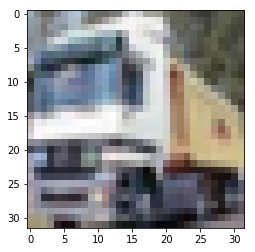

In [3]:
#print shape and type of data 

import matplotlib.pyplot as plt
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

#plotting simple image in dataset

plt.imshow(X_train[1], cmap = 'gray')

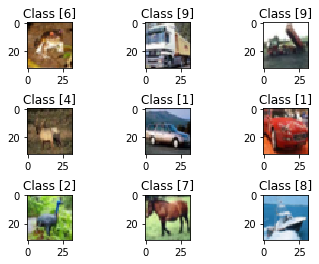

In [4]:
#plot simple dataset image and label of its

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
  plt.subplots_adjust(hspace = 0.9, wspace = 0.2)
  plt.title("Class {}".format(y_train[i]))

In [0]:
#normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

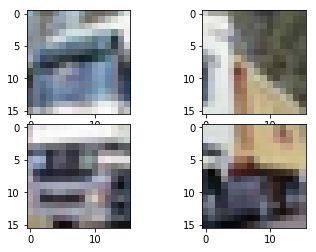

In [6]:
#show simple divide of images
sub_image_1 = X_train[1, 0:16, 0:16, :]
sub_image_2 = X_train[1, 0:16, 16:, :]
sub_image_3 = X_train[1, 16:, 0:16, :]
sub_image_4 = X_train[1, 16:, 16:, :]

sub_images = [sub_image_1, sub_image_2, sub_image_3, sub_image_4]

i=0
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(sub_images[i], cmap = 'gray', interpolation = 'none')
  plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
  #plt.title("Class {}".format(y_train[i]))


In [7]:
#generate devided image for all image in train data

X_train_devided = []
y_train_devided = []

for index in range(0, X_train.shape[0]):
  X_train_devided.append(X_train[index, 0:16, 0:16, :])
  y_train_devided.append(0)
  X_train_devided.append(X_train[index, 0:16, 16:, :])
  y_train_devided.append(1)
  X_train_devided.append(X_train[index, 16:, 0:16, :])
  y_train_devided.append(2)
  X_train_devided.append(X_train[index, 16:, 16:, :])
  y_train_devided.append(3)
  
  
X_train_devided = np.asarray(X_train_devided)
y_train_devided = np.asarray(y_train_devided)
y_train_devided = y_train_devided.reshape(200000, 1)
print(X_train_devided.shape)
print(y_train_devided.shape)

(200000, 16, 16, 3)
(200000, 1)


In [0]:
#import keras package 

import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D,Dropout, GlobalMaxPooling2D
from keras.layers import Conv2D
from keras.utils import np_utils
from keras import regularizers
from keras import applications
from keras.models import Model

In [9]:
#convert label to categorical mode (One-Hot)

from keras.utils import np_utils
print(y_train_devided[5])
Y_train_devided = np_utils.to_categorical(y_train_devided, 4)
#Y_test = np_utils.to_categorical(y_test, 100)
print(Y_train_devided[5])

[1]
[0. 1. 0. 0.]


In [11]:
#define model

weight_decay = 1e-4
input_shape = (None, None, 3) 
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(Dropout(0.25)) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(16, (5, 5), activation='relu')) 
model.add(Dropout(0.25)) 
model.add(GlobalMaxPooling2D()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3, activation='relu')) 
model.add(Dense(4, activation='softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, None, None, 64)    0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 16)    25616     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, None, 16)    0         
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                0         
__________

In [0]:
#model compile 

batch_size = 32
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [15]:
#model fit

model.fit(X_train_devided, Y_train_devided, epochs = 50 ,batch_size = batch_size, verbose = 1)

Epoch 1/50
200000/200000 [==============================] - 26s 129us/step - loss: 1.2952 - acc: 0.3634
Epoch 2/50
200000/200000 [==============================] - 26s 129us/step - loss: 1.0562 - acc: 0.5471
Epoch 3/50
200000/200000 [==============================] - 26s 129us/step - loss: 0.8921 - acc: 0.6453
Epoch 4/50
200000/200000 [==============================] - 26s 132us/step - loss: 0.8242 - acc: 0.6769
Epoch 5/50
200000/200000 [==============================] - 26s 130us/step - loss: 0.7896 - acc: 0.6907
Epoch 6/50
200000/200000 [==============================] - 26s 128us/step - loss: 0.7681 - acc: 0.6994
Epoch 7/50
200000/200000 [==============================] - 26s 130us/step - loss: 0.7495 - acc: 0.7074
Epoch 8/50
200000/200000 [==============================] - 26s 130us/step - loss: 0.7368 - acc: 0.7122
Epoch 9/50
200000/200000 [==============================] - 26s 129us/step - loss: 0.7264 - acc: 0.7162
Epoch 10/50
200000/200000 [==============================] - 26s

In [16]:
#print model summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, None, None, 64)    0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 16)    25616     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, None, 16)    0         
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                0         
__________

In [17]:
#generate intermediate layer output

from keras import backend as K

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('conv2d_6').output)

intermediate_output = intermediate_layer_model.predict(X_test)


print(intermediate_output.shape)

(10000, 10, 10, 16)


In [18]:
intermediate_output = intermediate_output.reshape(10000, 1600)
print(intermediate_output.shape)

(10000, 1600)


In [0]:
#import sklearn preprocessing tools to scaling data

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [20]:
#fit PCA model on intermediate layer output

from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # PCA output with 2 dimension
pca.fit(intermediate_output)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
#transform data from high dimension to low dimension

X_pca = pca.transform(intermediate_output)
print(X_pca.shape)

(10000, 2)


In [22]:
#scaling data

scalerX = StandardScaler()
scalerX.fit(X_pca)

pca_out = scalerX.transform(X_pca)

#print shape of PCA output
print(pca_out.shape)

(10000, 2)


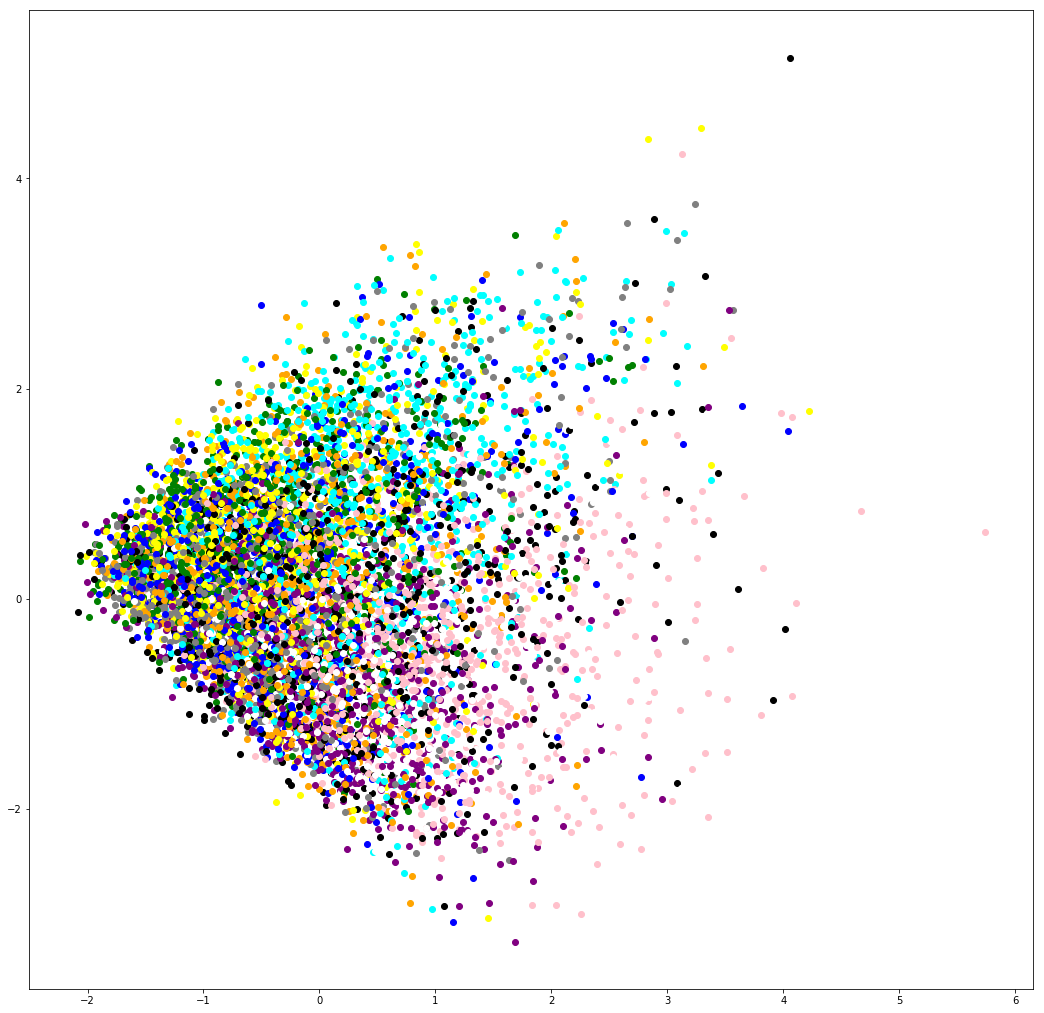

In [23]:
#plot pca output
fig = plt.figure(figsize=(18, 18))

#for each label set specific color to show it
for index in range(0, pca_out.shape[0]):
    if y_test[index] == 0:
      color = 'black'
    if y_test[index] == 1:
      color = 'white'
    if y_test[index] == 2:
      color = 'yellow'
    if y_test[index] == 3:
      color = 'blue'
    if y_test[index] == 4:
      color = 'green'
    if y_test[index] == 5:
      color = 'orange'
    if y_test[index] == 6:
      color = 'gray'
    if y_test[index] == 7:
      color = 'cyan'
    if y_test[index] == 8:
      color = 'purple'
    if y_test[index] == 9:
      color = 'pink'
    plt.scatter(pca_out[index][0], pca_out[index][1], marker = 'o', color = color)

In [0]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(intermediate_output)
distances, indices = nbrs.kneighbors(intermediate_output[0:10])

In [27]:
print(indices)

[[   0 4293 5555  172  334 1645]
 [   1 1144 3729 1422 4206 7626]
 [   2 2152 6975 1398   27 1525]
 [   3 2027  469 7773 8971 4524]
 [   4 2406 7308 5510 3693 7277]
 [   5 5424 1071 6016 4043 6239]
 [   6 6281 3902 4478 8825 9488]
 [   7  236 8902 4814  901  963]
 [   8  301 3556 7397 9453 9156]
 [   9 1147 8068 2099 5657 3030]]


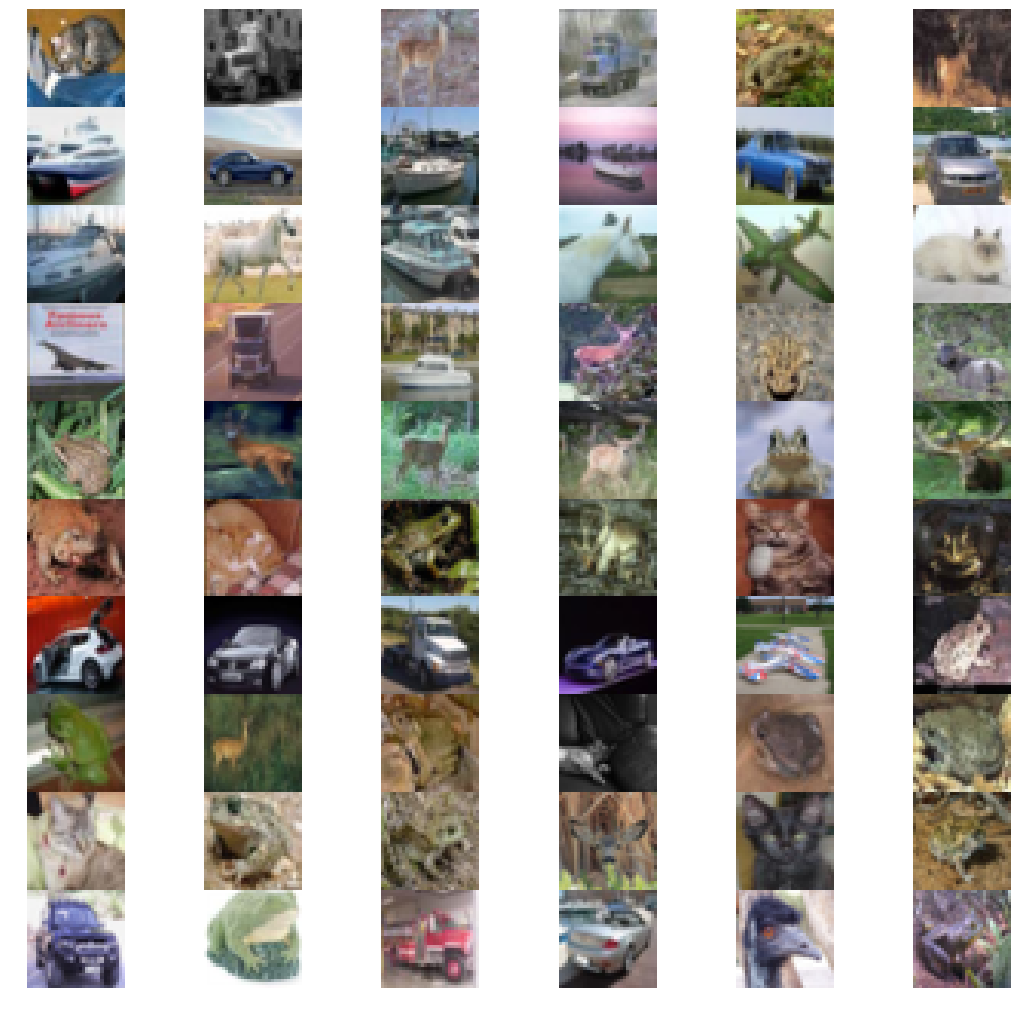

In [31]:
fig = plt.figure(figsize=(18, 18))
counter = 1

for index in range(10):
  for image in range(6):
    plt.subplot(10, 6, counter)
    plt.axis('off')
    plt.imshow(X_test[indices[index][image]], cmap = 'gray')
    plt.subplots_adjust(hspace = 0, wspace = 0.5)
    #plt.title('Original Image Without Noise')
    counter += 1
  

## Report

<p dir = 'rtl' style="text-align:right;">  
    در این تمرین همانطور که خواسته شده است تصاویر هر یک به چهار زیر تصویر تقسیم شده و برچسبی مطابق با روش ذکر شده در سوال به آن ها نسبت داده شده است. سپس آموزش بر اساس این تصویر صورت گرفته. در نهایت تست روی تصاویر اصلی آزمون انجام شد که نشان داد این روش میتواند در این تشخیص مطلوب باشد . سپس خروجی لایه پیچشی سوم براساس داده های آزمون به دست آمد و با استفاده از یک روال کاهش بعد، فضای ویژگی ها به یک فضای دو بعدی کاهش داده شد. در نهایت داده های این فضا با در نظر گرفتن رنگی اختصاصی به اعضای هر یک از برچشب ها در فضای دو بعدی به نمایش درآمد.  باید گفت در مسائلی که داده ها دارای ساختار مشخص هستند استفاده از این روش در شبکه های مبتنی بر  کانولوشن به علت پیمایش کل فضا توسط پنجره کانولوشنی، میتواند کاربردی باشد. اما در مسائلی که داده ها از ساختار ها تبعیت نمیکنند این رویکرد راه گشا نخواهد بود. لایه گلوبال ماکس پولینگ در واقع همان روال ماکس پولینگ است با این تفاوت که به طور همزمان یک روند کاهش بعد را روی خروجی خود اعمال مینماید و اغلب در پایان شبکه های کانولوشنی قرار میگیرد تا بتواند ورودی مورد انتظار لایه دنس را فراهم آورد. در ضمن 5 همسایگی نزدیک به هر یک از 10 داده اول آزمون نیز در بالا آورده شده است.. 
</p>

# Problem No.5

In [0]:
!pip install tqdm

In [0]:
#import tqdm to ease for show gan generated image 
from tqdm import tqdm_notebook

In [0]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

%config IPCcompeleter.greedy = True

import tensorflow 
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
np.random.seed(400)

In [0]:
#splitting data to train and test

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
#normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

In [0]:
#reshape data

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
#import keras package 

from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten,Input,UpSampling2D, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Conv2D
from keras.utils import np_utils
from keras.models import Model
from keras.optimizers import SGD
from keras import backend as K
from keras.optimizers import Adam, RMSprop

In [0]:
#define GAN model

# Set the dimensions of the noise
z_dim = 100

adam = Adam(lr=0.0002, beta_1=0.5)

g = Sequential()
g.add(Dense(1024, input_dim=z_dim, activation=LeakyReLU(alpha=0.2)))
g.add(Dense(784, activation='sigmoid'))  # Values between 0 and 1
g.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

d = Sequential()
d.add(Dense(1024, input_dim=784, activation=LeakyReLU(alpha=0.2)))
d.add(Dropout(0.3))
d.add(Dense(1, activation='sigmoid'))  # Values between 0 and 1
d.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

d.trainable = False
inputs = Input(shape=(z_dim, ))
hidden = g(inputs)
output = d(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [0]:
def plot_loss(losses):
    """
    @losses.keys():
        0: loss
        1: accuracy
    """
    d_loss = [v[0] for v in losses["D"]]
    g_loss = [v[0] for v in losses["G"]]
    #d_acc = [v[1] for v in losses["D"]]
    #g_acc = [v[1] for v in losses["G"]]
    
    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")
    #plt.plot(d_acc, label="Discriminator accuracy")
    #plt.plot(g_acc, label="Generator accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
    noise = np.random.normal(0, 1, size=(n_ex, z_dim))
    generated_images = g.predict(noise)
    generated_images = generated_images.reshape(n_ex, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
#define Generator and discreminator loss

# Set up a vector (dict) to store the losses
losses = {"D":[], "G":[]}

def train(epochs=1, plt_frq=1, BATCH_SIZE=128):
    batchCount = int(X_train.shape[0] / BATCH_SIZE)
    print('Epochs:', epochs)
    print('Batch size:', BATCH_SIZE)
    print('Batches per epoch:', batchCount)
    
    for e in tqdm_notebook(range(1, epochs+1)):
        if e == 1 or e%plt_frq == 0:
            print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):  # tqdm_notebook(range(batchCount), leave=False):
            # Create a batch by drawing random index numbers from the training set
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)]
            # Create noise vectors for the generator
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            
            # Generate the images from the noise
            generated_images = g.predict(noise)
            X = np.concatenate((image_batch, generated_images))
            # Create labels
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 0.9  # One-sided label smoothing

            # Train discriminator on generated images
            d.trainable = True
            d_loss = d.train_on_batch(X, y)

            # Train generator
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            y2 = np.ones(BATCH_SIZE)
            d.trainable = False
            g_loss = gan.train_on_batch(noise, y2)

        # Only store losses from final batch of epoch
        losses["D"].append(d_loss)
        losses["G"].append(g_loss)

        # Update the plots
        if e == 1 or e%plt_frq == 0:
            plot_generated()
    plot_loss(losses)

Epochs: 500
Batch size: 128
Batches per epoch: 468


--------------- Epoch 1 ---------------


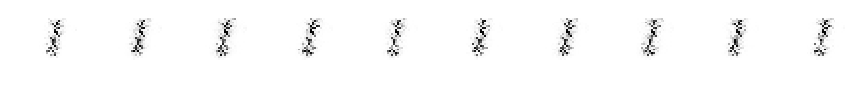

--------------- Epoch 100 ---------------


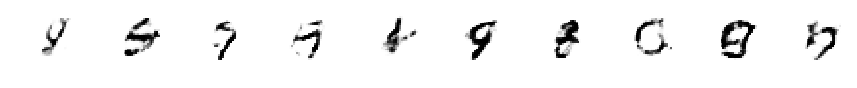

--------------- Epoch 200 ---------------


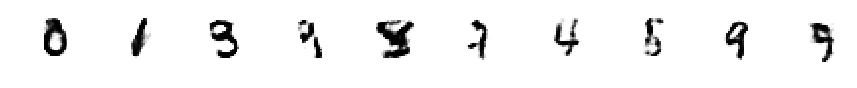

--------------- Epoch 300 ---------------


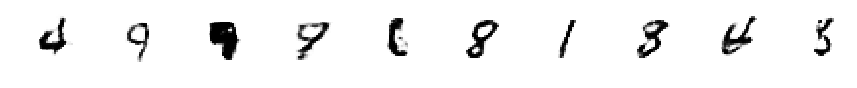

--------------- Epoch 400 ---------------


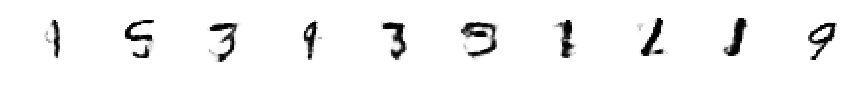

--------------- Epoch 500 ---------------


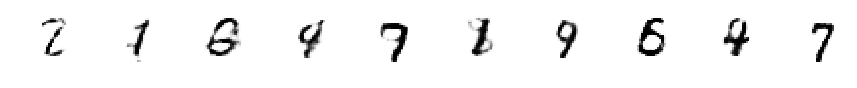

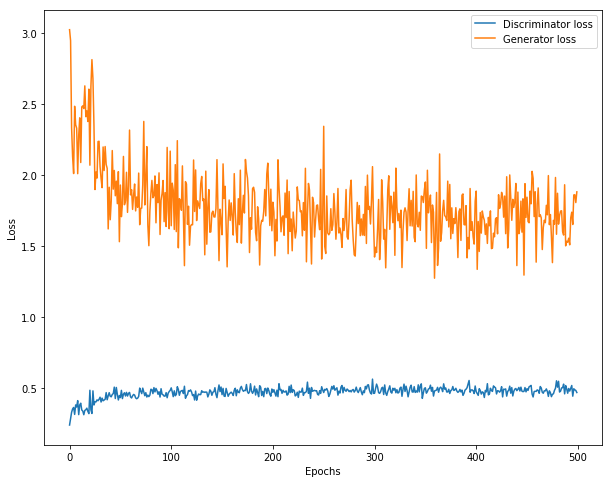

In [0]:
train(epochs=500, plt_frq=100, BATCH_SIZE=128)

## Report

<p dir = 'rtl' style="text-align:right;">  
    در این تمرین پس از آموزش داده های امنیست توسط شبکه تولیدگر داده های تولیدی را در بازه های زمانی مشخص به نمایش گذاشتیم و همانطور که مشخص است با ادامه یافتن فرآیند آموزش داده های تولید شده بسیار هم مفهوم با داده های اصلی هستند.ضمنا الگوریتم بهینه سازی استفاده شده و پیشنهادی ما در این مسئله آدام میباشد. به علت این که این الگوریتم بهینه سازی علاوه بر بهره گیری از ایده مومنتوم یک ضریبی را به عنوان اصطحکاکی برای حرکت روی تابع خطا در نظر میگیرد.
</p>

# Problem No.6

### Variational Autoencoder

<p dir = 'rtl' style="text-align:right;">  
    در این دسته از شبکه ها با کد کردن دادگان ورودی به یک سری میانگین و واریانس جهت بیان توزیع ها دست می یابیم که سپس از آن ها نمونه برداری تصادفی صورت میگیرد و این نمونه ها جهت عملیات بازسازی مورد استفاده قرار میگیرد
</p>

<img src='images/Variational AutoEncoderpng.png'>

### Generative Adversarial NeuralNetworks (GAN)

<p dir = 'rtl' style="text-align:right;">  
    این دسته از شبکه ها از دو بخش تولیدگر و تمیز دهنده تشکیل شده اند. تولید گر سعی دارد دقت خود را افزایش داده و همچنین با تولید داده های دروغین به طوری که تمیز دهنده آن ها را یک تصویر حقیقی تشخیص دهد، سعی بر کاهش دقت تمیز دهنده در این تشخیص دارد. همچنین از طرف دیگر تمیز دهنده سعی میکند دقت خود را در تشخیص افزایش دهد. این روال باعث میشود که تصاویر تولید شده بسیار هم مفهوم با تصاویر آموزشی به نظر برسند در مواردی که ما به شروط مناسب برای استفاده در شبکه های تولیدگر شرطی دست نیافته ایم  کارایی این شبکه ها میتواند بهتر باشد.
</p>

<img src='images/generative adversarial neural network.png'>

### VAE-GAN

<p dir = 'rtl' style="text-align:right;">  
    همانطور که از نام این دسته از شبکه ها پیداست ترکیبی از دو شبکه بالا هستند و تصویری که تمیز دهنده آن را با تصاویر واقعی میسنجد در واقع خروجی باز سازی شده از روی نمونه برداری های تصادفی انجام شده از روی میانگین و واریانس به دست آمده در مرحله دیکد است.
</p>

<img src='images/VAE-GAN.jpeg'>

### Conditional GAN

<p dir = 'rtl' style="text-align:right;">  
    در شبکه های تولیدگر بدون شرط کنترلی بر روی نحوه تولید دیتا از توزیع های تصادفی وجود ندارد اما در شبکه های تولید گر شرطی، تولید گر می آموزد که نمونه های دروغین را با استفاده از شروطی مشخص تولید نماید. این روند میتواند همگرایی بهتری را در جهت تولید خروجی هایی که انتظار آن ها را داشتیم به ما دهد. به همین طریق احتمالا در صورت در نظر گرفتن شروط درست، کارایی این شبکه ها نیز بالا خواهد رفت و کاربرد این شبکه را در مواردی میتوان دانست که امکان به دست آوردن شروط مناسب برای آن مسئله خاص برای ما وجود دارد.
</p>

<img src='images/Conditional-GAN.png'>

### Adversarial Autoencoder

<p dir = 'rtl' style="text-align:right;">  
    کار این دسته از شبکه ها تاثیر دادن دانش قبلی و توزیع مربوط به آن در لایه میانی اتوانکدر است. به این گونه این شبکه ها سعی بر افزایش کارایی با تکیه بر استفاده از توزیع اطلاعات گذشته مسئله دارند.
</p>

<img src = 'images/adversarial-autoencoder.jpg'>

### Flow Base Generative Model

<p dir = 'rtl' style="text-align:right;">  
    در این دسته ، مدل سعی بر بهبود کارایی به وسیله نرمالیزه کردن جریان دارد. این روند توزیعی ساده را با استفاده از دنباله ای از توابع تبدیل معکوس پذیر به توزیعی پیچیده تبدیل میکند. 
</p>

<img src='images/flowbased-generative-models.png'>

# Problem No.7

<p dir = 'rtl' style="text-align:right;">  
    برای آموزش شبکه های تولیدگر نیاز به صرف زمان و هزینه محاسباتی زیادی میباشد. لذا از یک سری روش های هیوریستیک برای کاهش زمان آموزش استفاده میگردد. این روش ها شامل موارد زیر است. 
</p>

In [0]:
We use tanh as the last activation in the generator, instead of sigmoid, which is
more commonly found in other types of models.

<p dir = 'rtl' style="text-align:right;">  
   از تابع فعالیت تانژانت هایپر بولیک به جای سیگمویید استفاده میکنیم.
</p>

In [0]:
We sample points from the latent space using a normal distribution (Gaussian distribution),
not a uniform distribution.

<p dir = 'rtl' style="text-align:right;">  
   نمونه برداری از لایه میانی را به جای استفاده از توزیع یکنواخت با استفاده از توزیع نرمال انجام دهیم.
</p>

In [0]:
Stochasticity is good to induce robustness. Because GAN training results in a
dynamic equilibrium, GANs are likely to get stuck in all sorts of ways. Introducing
randomness during training helps prevent this. We introduce randomness
in two ways: by using dropout in the discriminator and by adding random noise
to the labels for the discriminator.

<p dir = 'rtl' style="text-align:right;">  
    تصادفی بودن جهت افزایش استحکام مناسب است و ایجاد پروسه ای تصادفی در طول آموزش در این زمینه به کمک ما میاید. ما تصادفی نمودن را با استفاده از دو روش انجام میدهیم: اول استفاده از دراپ آوت برای تمیز دهنده و دوم اضافه کردن نویز تصادفی به برچسب های تمیز دهنده
</p>

In [0]:
Sparse gradients can hinder GAN training. In deep learning, sparsity is often a
desirable property, but not in GANs. Two things can induce gradient sparsity:
max pooling operations and ReLU activations. Instead of max pooling, we recommend
using strided convolutions for downsampling, and we recommend
using a LeakyReLU layer instead of a ReLU activation. It’s similar to ReLU, but it
relaxes sparsity constraints by allowing small negative activation values.

<p dir = 'rtl' style="text-align:right;">  
     استفاده از یک روال کاهش نمونه صحیح به جای استفاده از ماکس پولینگ و همچنین استفاده از تابع فعالیت لیکی رلو به جای رلو جهت حذف محدودیت های اسپارسی 
</p>

In [0]:
In generated images, it’s common to see checkerboard artifacts caused by
unequal coverage of the pixel space in the generator (see figure 8.17). To fix
this, we use a kernel size that’s divisible by the stride size whenever we use a
strided Conv2DTranpose or Conv2D in both the generator and the discriminator.

<p dir = 'rtl' style="text-align:right;">  
    استفاده از اندازه کرنل با گام های قابل تقسیم در مواردی که به علت پوشش نابرابر فضای پیکسل در تولید کننده مقادیر شطرنجی نا خواسته ای ایجاد میگردد.
</p>